In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

<Figure size 100x100 with 0 Axes>

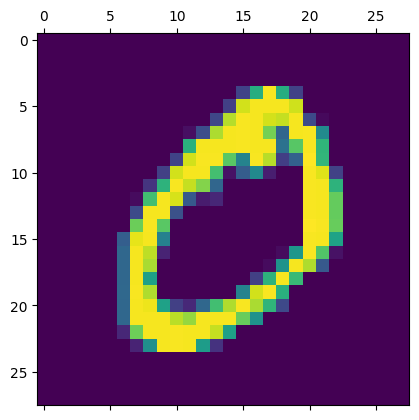

In [6]:
plt.figure(figsize=(1,1))
plt.matshow(x_train[1]);

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train[0].shape

(28, 28)

In [11]:
x_train = x_train/255
x_test = x_test/255 #scaling data to improve accuracy

In [12]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [13]:
x_train_flatten.shape

(60000, 784)

In [14]:
x_test_flatten.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
        )

model.fit(x_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4688 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9268


In [16]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2652 - accuracy: 0.9279


[0.2652127742767334, 0.9279000163078308]

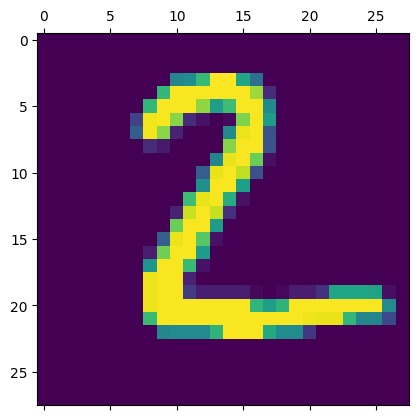

In [17]:
plt.matshow(x_test[1])

In [18]:
y_predicted = model.predict(x_test_flatten)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([4.0450403e-01, 3.2345366e-03, 9.9911380e-01, 2.9226363e-01,
       8.6103441e-10, 8.3395439e-01, 8.8447845e-01, 1.1670816e-12,
       1.3961574e-01, 3.0691891e-09], dtype=float32)

In [19]:
np.argmax(y_predicted[1])

2

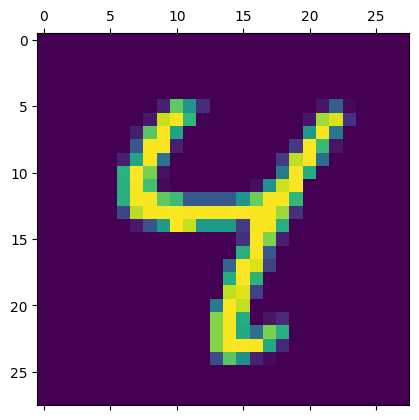

In [20]:
plt.matshow(x_test[6])

In [21]:
y_predicted[6]

array([7.7324791e-04, 3.9376031e-05, 1.6521031e-04, 3.1703070e-02,
       9.9646777e-01, 5.0853109e-01, 1.2334115e-02, 1.9491118e-01,
       8.3288425e-01, 7.7091527e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[6])

4

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
# confusion matrix
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

In [27]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    2,    4,    2,   12,    0],
       [   7,    8,  920,   17,   10,    4,   13,   10,   39,    4],
       [   3,    0,   18,  919,    1,   23,    2,   10,   23,   11],
       [   1,    1,    4,    1,  914,    0,    9,    3,   10,   39],
       [  11,    2,    2,   29,   11,  779,   13,    5,   32,    8],
       [  13,    3,    4,    1,    7,   13,  913,    2,    2,    0],
       [   2,    5,   22,    5,    9,    1,    0,  942,    3,   39],
       [   7,    6,    6,   17,    9,   22,    8,   10,  882,    7],
       [  11,    5,    1,    8,   25,    7,    0,   12,    7,  933]])>

<Axes: >

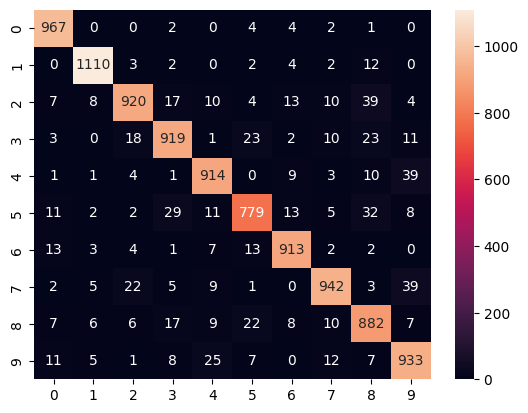

In [29]:
import seaborn as sns
sns.heatmap(cm,annot = True,fmt = 'd')

In [30]:
# hidden layer 

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
        )

model.fit(x_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2744 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1244 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9838


In [31]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9746


[0.08233614265918732, 0.9746000170707703]

313/313 [==============================] - 1s 2ms/step


<Axes: >

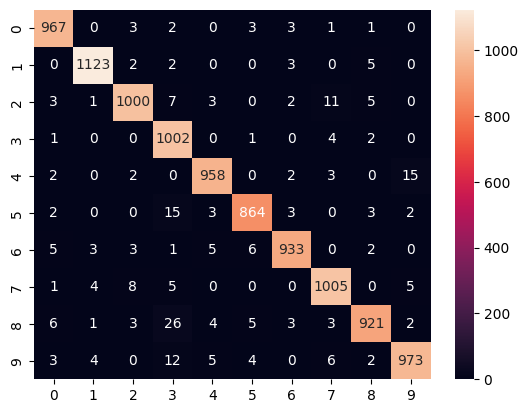

In [32]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]


cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)

import seaborn as sns
sns.heatmap(cm,annot = True,fmt = 'd')

In [34]:
# flatten auto

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
        )

model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4628 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9164
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9223
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9256
